## Проект Яндекс Афиша


## Цель проекта

В проекте использованы данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. Продуктовым отделом отмечено изменение пользовательского спроса и выдвинуты 2 гипотезы: 
1) среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств;
2) среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

**Цели проекта:**
- проанализировать распределение заказов по сегментам и их сезонные изменения;
- проанализировать осеннюю активность пользователей;
- определить популярные события и партнеров;
- проверить выдвинутые гипотезы.

## План работы

1. Загрузка данные и знакомство с ними
> 
3. Предобработка данных и подготовка их к исследованию
- 2.1. Проверка на наличие дубликатов
- 2.2. Преобразование типов данных
- 2.3. Проверка распределения данных
    - 2.3.1. Распределение выручки в рублях
    - 2.3.2. Распределение выручки в тенге
    - 2.3.3. Распределение количества заказов в рублях
    - 2.3.4. Распределение количества заказов в тенге
- 2.3. Создание новых столбцов в датафрейме
3. Исследовательский анализ данных
- 3.1. Анализ распределения заказов по сегментам и их сезонные изменения
    - 3.1.1. Распределение заказов по месяцам
    - 3.1.2. Сезонное распределение заказов по типам мероприятий
    - 3.1.3. Сезонное распределение заказов по типу устройств
    - 3.1.4. Сезонное распределение заказов по возрастному рейтингу
    - 3.1.5. Сезонная выручка с продажи одного билета в зависимости от типа мероприятия  
>
- 3.2. Осенняя активность пользователей
    - 3.2.1. Динамика изменений по дням
    - 3.2.2. Недельная цикличность по дням недели
    - 3.2.3. Недельная цикличность с категоризацией на выходные и будние дни
>
- 3.3. Распределение популярности событий и пользовательской активности в разрезе билетных партнеров
    - 3.3.1. Распределение популярности событий и пользовательской активности в регионах
    - 3.3.2. Распределение популярности событий и пользовательской активности в разрезе билетных партнеров

4. Статистический анализ данных
    - 4.1. Гипотеза 1
    - 4.2. Гипотеза 2.

## 1. Загрузка данных и знакомство с ними

Импортируем необходимые библиотеки и функции для тестирования гипотез, создаем датафреймы и знакомимся с их содержимым

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

pd.set_option('display.max_columns', None)

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
purchases = pd.read_csv('final_tickets_orders_df.csv')
events = pd.read_csv('final_tickets_events_df.csv')
rate = pd.read_csv('final_tickets_tenge_df.csv')

In [3]:
display(purchases.head())
display(events.head())
display(rate.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [4]:
display(purchases.info())
display(events.info())
display(rate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


None

**Промежуточный вывод этапа знакомства с данными:**

- Предварительный анализ данных показал, что **в датафрейме `purchases`**:
    - имеется 290_849 записей.
    - есть пропуски в столбце `days_since_prev`, который показывает количество дней с предыдущей покупки для каждого пользователя. Пропуски означают отсутствие покупки.
    - столбцы с датой `created_dt_msk` и `created_ts_msk` имеют неправильный тип данных - `object`, следует заменить на `datetime64`.
    - столбец `days_since_prev` имеет тип данных `float64`, что объяняется наличием пропусков. 
    
    
- **в датафрейме `events`** имеется 22_427 записи, пропуски отсутствуют, типы данных соответствуют.  


- **в датафреме `rate`**:
     - имеются 357 записей, пропуски отсутствуют.
     - в столбце `data` указан неправильный тип данных - `object`, следует заменить на `datetime64`.  
     
---

## 2. Предобработка данных и подготовка их к исследованию

### 2.1. Проверка на наличие дубликатов

Объединим датафреймы `events` и `purchases` в единый датафрейм `afisha` по столбцу идентификатора мероприятия 'event_id'. Проверим наличие неявных дубликатов и удалим их

In [5]:
afisha = pd.merge(purchases,
                  events,
                  on = 'event_id',
                  how = 'inner')
afisha.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [6]:
afisha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

In [7]:
afisha.duplicated(subset=['user_id', 
                          'event_name', 
                          'created_dt_msk',
                          'created_ts_msk',
                          'event_id', 
                          'cinema_circuit',
                          'age_limit',
                          'currency_code',
                          'device_type_canonical',
                          'revenue',
                          'service_name',
                          'tickets_count',
                          'total',
                          'days_since_prev',
                          'event_name',
                          'event_type_description',
                          'event_type_main',
                          'organizers',
                          'region_name',
                          'city_name', 
                          'city_id',
                          'venue_id',
                          'venue_name',
                          'venue_address']).sum()

30

In [8]:
afisha.drop_duplicates(subset=['user_id', 
                               'event_name', 
                               'created_dt_msk',
                               'created_ts_msk',
                               'event_id', 
                               'cinema_circuit',
                               'age_limit',
                               'currency_code',
                               'device_type_canonical',
                               'revenue',
                               'service_name',
                               'tickets_count',
                               'total',
                               'days_since_prev',
                               'event_name',
                               'event_type_description',
                               'event_type_main',
                               'organizers',
                               'region_name',
                               'city_name', 
                               'city_id',
                               'venue_id',
                               'venue_name',
                               'venue_address'], keep='first', inplace=True)
afisha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290581 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290581 non-null  int64  
 1   user_id                 290581 non-null  object 
 2   created_dt_msk          290581 non-null  object 
 3   created_ts_msk          290581 non-null  object 
 4   event_id                290581 non-null  int64  
 5   cinema_circuit          290581 non-null  object 
 6   age_limit               290581 non-null  int64  
 7   currency_code           290581 non-null  object 
 8   device_type_canonical   290581 non-null  object 
 9   revenue                 290581 non-null  float64
 10  service_name            290581 non-null  object 
 11  tickets_count           290581 non-null  int64  
 12  total                   290581 non-null  float64
 13  days_since_prev         268668 non-null  float64
 14  event_name              2

---

### 2.2. Преобразование типов данных


- Анализ типов данных датафрейма afisha показал, что тип данных в столбцах `created_dt_msk`, `created_ts_msk` неверный. Преобразуем тип данных `object` в `datetime64`.
- Проведем оптимизацию целочисленных типов данных с столбцах `order_id`, `event_id`, `age_limit`, `city_id`, `venue_id`.

In [9]:
afisha['created_dt_msk'] = afisha['created_dt_msk'].astype('datetime64[ns]')
afisha['created_ts_msk'] = afisha['created_ts_msk'].astype('datetime64[ns]')

In [10]:
for column in ['order_id', 'event_id', 'age_limit', 'city_id', 'venue_id']:
    afisha[column] = pd.to_numeric(afisha[column], 
                                   downcast = 'integer')

In [11]:
afisha.dtypes

order_id                           int32
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int32
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                      int64
total                            float64
days_since_prev                  float64
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                            int32
venue_id                           int16
venue_name                        object
venue_address                     object
dtype: object

---

### 2.3. Проверка распределения данных 


#### 2.3.1. Распределение выручки в рублях

- Проверим распределение значений выручки `revenue`, используя гистограмму и диаграмму размаха, *предварительно отфильтровав выручку в рублях*.
- Проверим распределение выручки в рублях методом .describe()

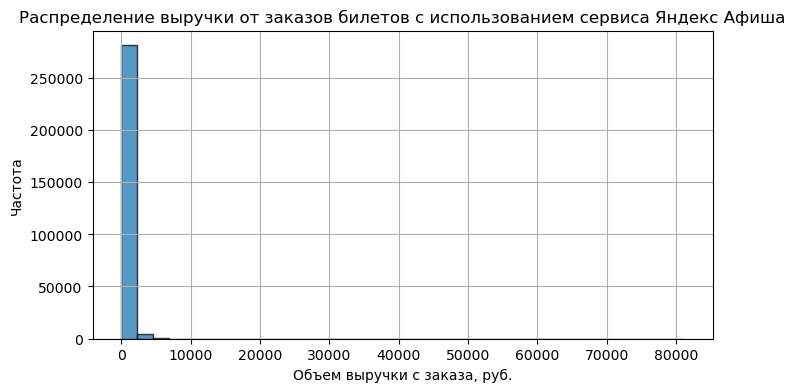

In [12]:
filtered_afisha_rub = afisha.query("currency_code == 'rub'")

plt.figure(figsize=(8, 4))

filtered_afisha_rub['revenue'].plot(
    kind='hist',
    bins=35, 
    alpha=0.75,
    edgecolor='black',
    rot=0
)

plt.title('Распределение выручки от заказов билетов с использованием сервиса Яндекс Афиша')
plt.xlabel('Объем выручки с заказа, руб.')
plt.ylabel('Частота')
plt.grid()
plt.show()

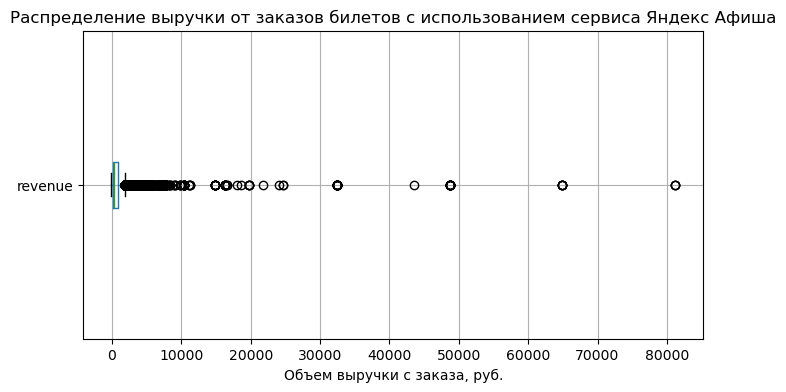

In [13]:
boxplot = filtered_afisha_rub.boxplot(
    column='revenue',
    vert=False,
    grid=True,
    figsize=(8, 4))                       

boxplot.set_title('Распределение выручки от заказов билетов с использованием сервиса Яндекс Афиша')
boxplot.set_xlabel('Объем выручки с заказа, руб.')
plt.show()

In [14]:
filtered_afisha_rub['revenue'].describe()

count    285512.000000
mean        548.036278
std         871.782124
min         -90.760000
25%         114.190000
50%         346.700000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

Анализ **распределения выручки с заказа в рублях** показал, что распределение неравномерное:
- среднее значение = 548 рублей
- медиана = 346 рублей
- 75% значений находится в пределах 793 рублей
- максимальное значение = 81174 рубля
- стандартное отклонение = 871.8 рублей
- есть отрицательные значения, минимальное значение = -90.8 рублей

**Гистограмма распределения и диаграмма размаха показали наличие большого количества выбросов.**

Будем считать условными выбросами значения выше 99-ого процентиля по значениям выручки. Отфильтруем выбросы и построим диаграмму размаха для полученного датасета new_afisha_rub.


In [15]:
outliers = filtered_afisha_rub['revenue'].quantile(0.99)
new_afisha_rub = filtered_afisha_rub.loc[filtered_afisha_rub['revenue'] < outliers]
new_afisha_rub['revenue'].describe()

count    282655.000000
mean        510.411614
std         500.131525
min         -90.760000
25%         112.100000
50%         340.660000
75%         781.720000
max        2569.610000
Name: revenue, dtype: float64

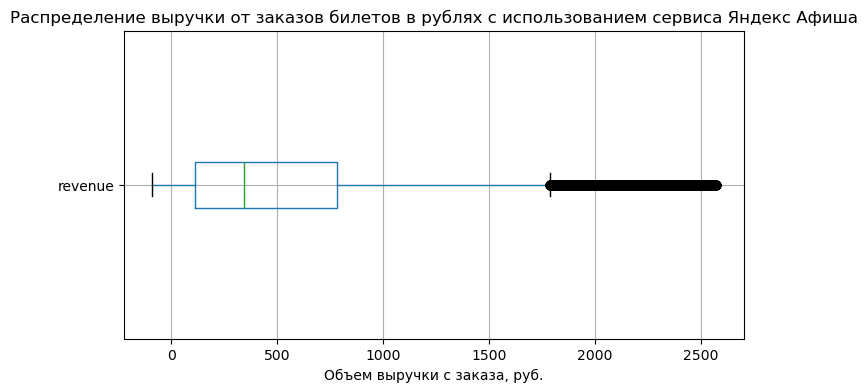

In [16]:
boxplot = new_afisha_rub.boxplot(
    column='revenue',
    vert=False,
    grid=True,
    figsize=(8, 4))

boxplot.set_title('Распределение выручки от заказов билетов в рублях с использованием сервиса Яндекс Афиша')
boxplot.set_xlabel('Объем выручки с заказа, руб.')
plt.show()

После удаления выбросов распределение стало более компактным. Среднее значение стало значительно ближе к медиане: было 548, стало 510, уменьшилось стандартное отклонение: было 871.8, стало 500. 

#### 2.3.2. Распределение выручки в тенге

- Проверим распределение значений выручки `revenue`, используя гистограмму и диаграмму размаха, *предварительно отфильтровав выручку в тенге*.
- Проверим распределение выручки в тенге методом .describe()

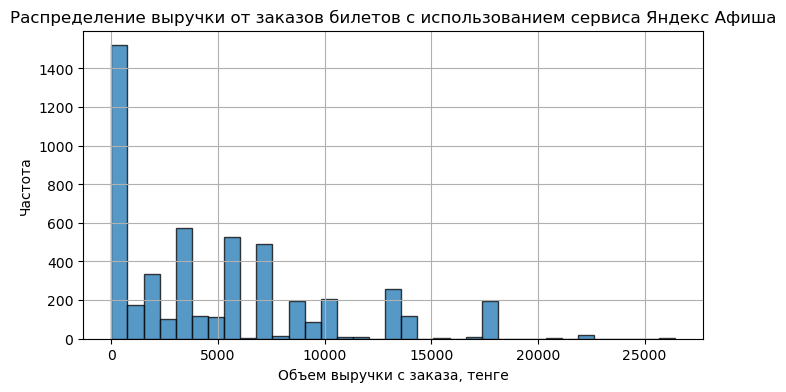

In [17]:
filtered_afisha_kzt = afisha.query("currency_code == 'kzt'")

plt.figure(figsize=(8, 4))

filtered_afisha_kzt['revenue'].plot(
    kind='hist',
    bins=35, 
    alpha=0.75,
    edgecolor='black',
    rot=0 
)

plt.title('Распределение выручки от заказов билетов с использованием сервиса Яндекс Афиша')
plt.xlabel('Объем выручки с заказа, тенге')
plt.ylabel('Частота')
plt.grid()
plt.show()

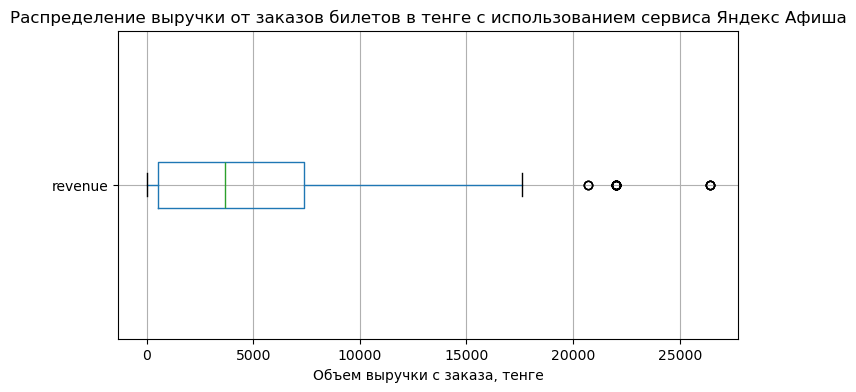

In [18]:
boxplot = filtered_afisha_kzt.boxplot(
    column='revenue',
    vert=False,
    grid=True,
    figsize=(8, 4)
) 

boxplot.set_title('Распределение выручки от заказов билетов в тенге с использованием сервиса Яндекс Афиша')
boxplot.set_xlabel('Объем выручки с заказа, тенге')
plt.show()

In [19]:
filtered_afisha_kzt['revenue'].describe()

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

Анализ **распределения выручки с заказа в тенге** показал, что распределение неравномерное:
- среднее значение = 4995 рублей
- медиана = 3698 рублей
- 75% значений находится в пределах 7397 рублей
- максимальное значение = 26425 рублей
- стандартное отклонение = 4916.8 рублей

Гистограмма распределения и диаграмма размаха показали наличие большого количества выбросов.

Будем считать условными выбросами значения выше 99-ого процентиля по значениям выручки. Отфильтруем выбросы и построим диаграмму размаха для полученного датасета new_afisha_kzt.

In [20]:
outliers = filtered_afisha_kzt['revenue'].quantile(0.99)
new_afisha_kzt = filtered_afisha_kzt.loc[filtered_afisha_kzt['revenue'] < outliers]
new_afisha_kzt['revenue'].describe()

count     4844.000000
mean      4378.842494
std       4072.645224
min          0.000000
25%        486.030000
50%       3698.830000
75%       7076.240000
max      17230.320000
Name: revenue, dtype: float64

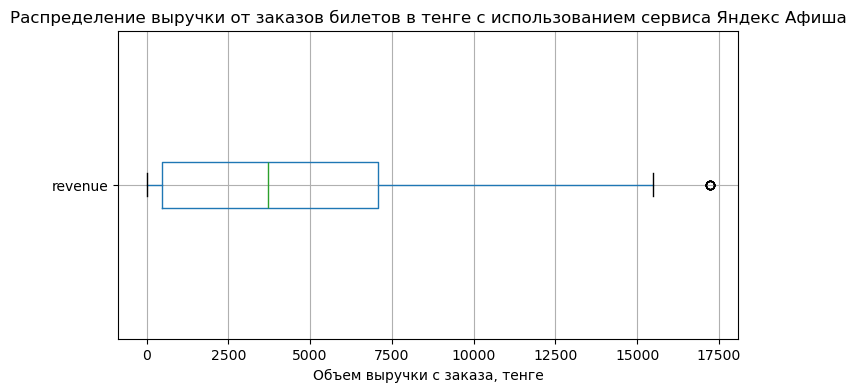

In [21]:
boxplot = new_afisha_kzt.boxplot(
    column='revenue',
    vert=False,
    grid=True,
    figsize=(8, 4)
)

boxplot.set_title('Распределение выручки от заказов билетов в тенге с использованием сервиса Яндекс Афиша')
boxplot.set_xlabel('Объем выручки с заказа, тенге')
plt.show()

После удаления выбросов распределение стало более компактным. Среднее значение стало ближе к медиане: было 4995, стало 4379, уменьшилось стандартное отклонение: было 4916, стало 4073. 

#### 2.3.3. Распределение количества заказов в рублях

- Проверим распределение количества билетов в заказе `tickets_count`, используя гистограмму и диаграмму размаха, *предварительно отфильтровав выручку в рублях*.
- Проверим распределение количества билетов в заказе в рублях методом .describe()

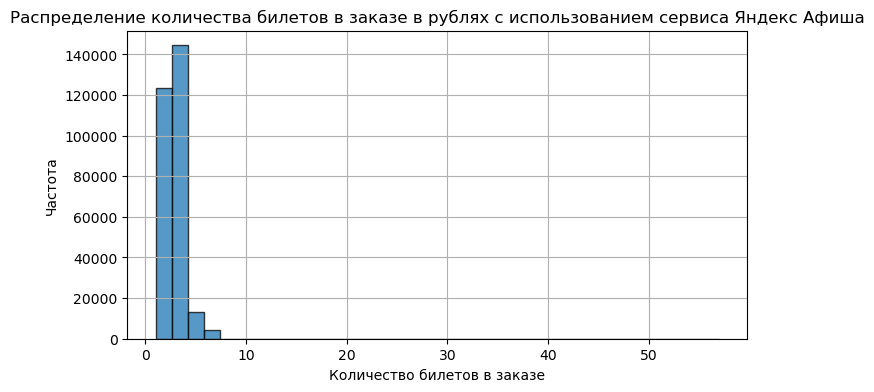

In [22]:
filtered_afisha_rub = afisha.query("currency_code == 'rub'")

plt.figure(figsize=(8, 4))

filtered_afisha_rub['tickets_count'].plot(
    kind='hist',
    bins=35, 
    alpha=0.75,
    edgecolor='black',
    rot=0 
)

plt.title('Распределение количества билетов в заказе в рублях с использованием сервиса Яндекс Афиша')
plt.xlabel('Количество билетов в заказе')
plt.ylabel('Частота')
plt.grid()
plt.show()

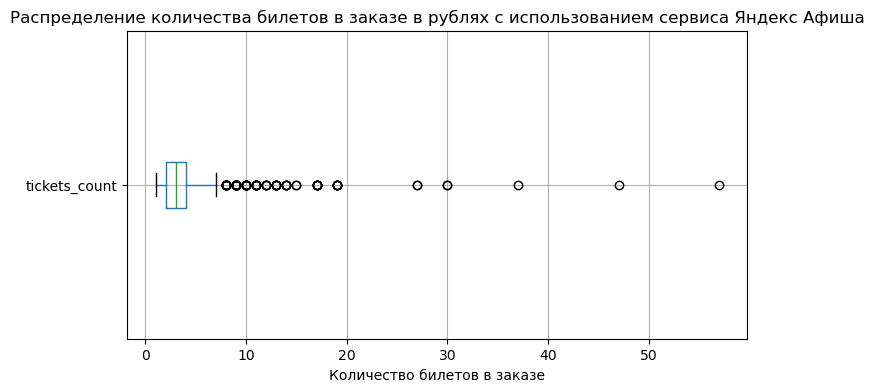

In [23]:
boxplot = filtered_afisha_rub.boxplot(
    column='tickets_count',
    vert=False,
    grid=True,
    figsize=(8, 4)
) 

boxplot.set_title('Распределение количества билетов в заказе в рублях с использованием сервиса Яндекс Афиша')
boxplot.set_xlabel('Количество билетов в заказе')
plt.show()

In [24]:
filtered_afisha_rub['tickets_count'].describe()

count    285512.000000
mean          2.754185
std           1.171569
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

Анализ **распределения количества билетов в заказе в рублях** показал, что распределение относительно равномерное, но есть выбросы:
- среднее значение = 2.75 билетов
- медиана = 3 билета
- 75% значений находится в пределах 4 билетов
- максимальное значение = 57 билетов
- стандартное отклонение = 1.17 рублей


Будем считать условными выбросами значения выше 99-ого процентиля по значениям выручки. Отфильтруем выбросы и построим диаграмму размаха для полученного датасета afisha_tik_rub.

In [25]:
outliers = filtered_afisha_rub['tickets_count'].quantile(0.99)
afisha_tik_rub = filtered_afisha_rub.loc[filtered_afisha_rub['tickets_count'] < outliers]
afisha_tik_rub['tickets_count'].describe()

count    281110.000000
mean          2.700420
std           1.080952
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: tickets_count, dtype: float64

После удаления выбросов распределение стало нормальным:
- среднее значение = 2.7;
- медиана = 3;
- максимальное значение = 5;
- стандартное отклонение = 1.08

Для данного исследования будем использовать данные с выбросами, возможно, в заказе было большое количество билетов.

#### 2.3.4. Распределение количества заказов в тенге

- Проверим распределение количества билетов в заказе `tickets_count`, используя гистограмму и диаграмму размаха, *предварительно отфильтровав выручку в тенге*.
- Проверим распределение количества билетов в заказе в тенге методом .describe()

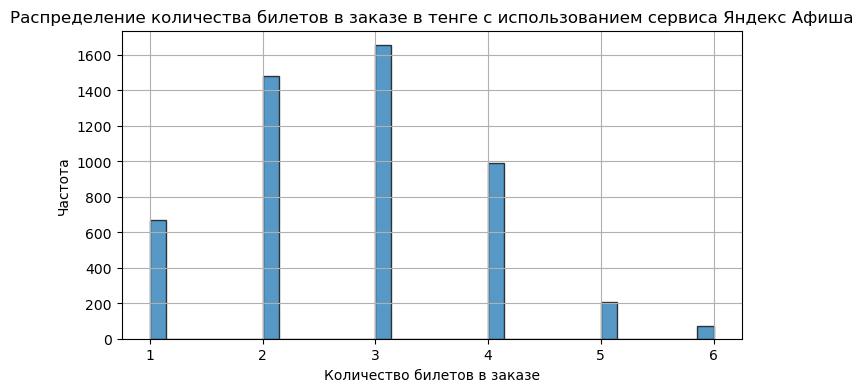

In [26]:
filtered_afisha_kzt = afisha.query("currency_code == 'kzt'")

plt.figure(figsize=(8, 4))

filtered_afisha_kzt['tickets_count'].plot(
    kind='hist',
    bins=35, # Устанавливаем количество корзин - всего 25
    alpha=0.75,
    edgecolor='black',
    rot=0
)

plt.title('Распределение количества билетов в заказе в тенге с использованием сервиса Яндекс Афиша')
plt.xlabel('Количество билетов в заказе')
plt.ylabel('Частота')
plt.grid()
plt.show()

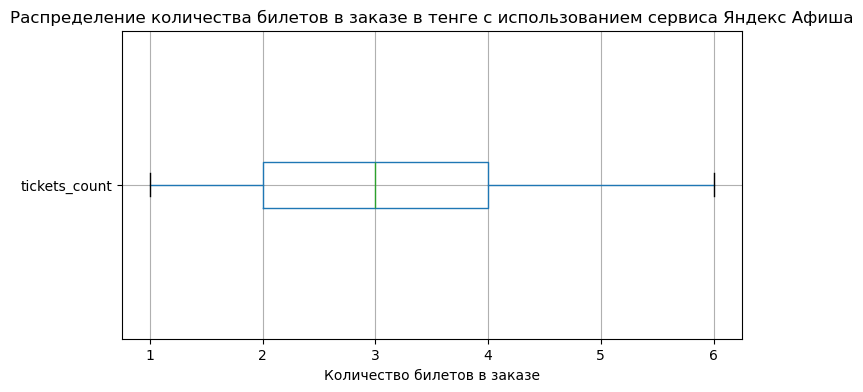

In [27]:
boxplot = filtered_afisha_kzt.boxplot(
    column='tickets_count',
    vert=False,
    grid=True,
    figsize=(8, 4)
) 

boxplot.set_title('Распределение количества билетов в заказе в тенге с использованием сервиса Яндекс Афиша')
boxplot.set_xlabel('Количество билетов в заказе')
plt.show()

In [28]:
filtered_afisha_kzt['tickets_count'].describe()

count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: tickets_count, dtype: float64

Анализ **распределения количества билетов в заказе в тенге** показал, что распределение близко к нормальному, выбросы отсутствуют:
- среднее значение = 2.76 билетов
- медиана = 3 билета
- 75% значений находится в пределах 4 билетов
- максимальное значение = 6 билетов
- стандартное отклонение = 1.1 билетов

---

### 2.4. Создание новых столбцов в датафрейме

- Преобразуем данные в столбцe `data` в датафрейме 'rate' в тип `datetime64`
- Объединим датафреймы 'afisha' и 'rate' в единый датафрейм 'afisha_rate' и удалим лишний столбец `data`
- Так как часть выручки указана в тенге, нужно привести эти данные к рублям. Создадим новый столбец `revenue_rub`, в котором вся выручка будет в рублях
- Выделим месяц выполнения заказа в отдельный столбец `month`
- Добавим столбец со значением выручки с продажи одного билета на мероприятие `one_ticket_revenue_rub`
- Создадим столбец `season` с указанием сезонности с категориями 'лето', 'осень', 'зима', 'весна'

In [29]:
rate['data'] = rate['data'].astype('datetime64[ns]')

In [30]:

afisha_rate = pd.merge(afisha,
                       rate,
                       how='left',
                       left_on = 'created_dt_msk',
                       right_on = 'data')
afisha_rate.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


In [31]:
afisha_rate = afisha_rate.drop('data', axis=1)
afisha_rate.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",100,19.6648,kzt


In [32]:
def convert_to_rub(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    else:
        return row['revenue'] * row['curs'] / 100

afisha_rate['revenue_rub'] = afisha_rate.apply(convert_to_rub, axis=1)

In [33]:
afisha_rate['month'] = afisha_rate['created_dt_msk'].dt.month

In [34]:
afisha_rate['one_ticket_revenue_rub'] = afisha_rate['revenue_rub'] / afisha_rate['tickets_count']

In [35]:
def categorize_date(month):
    if 3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'
    
afisha_rate['season'] = afisha_rate['month'].apply(categorize_date)

In [36]:
afisha_rate.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx,revenue_rub,month,one_ticket_revenue_rub,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt,1521.94,8,380.4850,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",100,18.3419,kzt,289.45,7,144.7250,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",100,19.6475,kzt,1258.57,10,314.6425,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",100,18.5010,kzt,8.49,7,4.2450,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",100,19.6648,kzt,1390.41,10,463.4700,осень


In [37]:
afisha_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290581 entries, 0 to 290580
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290581 non-null  int32         
 1   user_id                 290581 non-null  object        
 2   created_dt_msk          290581 non-null  datetime64[ns]
 3   created_ts_msk          290581 non-null  datetime64[ns]
 4   event_id                290581 non-null  int32         
 5   cinema_circuit          290581 non-null  object        
 6   age_limit               290581 non-null  int8          
 7   currency_code           290581 non-null  object        
 8   device_type_canonical   290581 non-null  object        
 9   revenue                 290581 non-null  float64       
 10  service_name            290581 non-null  object        
 11  tickets_count           290581 non-null  int64         
 12  total                   290581

---

Так как при анализе распределения выручки в рублях и тенге были обнаружены выбросы, отфильтруем выбросы в датафрейме, в котором вся выручка была переведена в рубли. Будем считать условными выбросами значения выше 99-ого процентиля по значениям выручки. 

---

In [38]:
outliers = afisha_rate['revenue_rub'].quantile(0.99)
revenue_rub_filtered = afisha_rate.loc[afisha_rate['revenue_rub'] < outliers]
revenue_rub_filtered['revenue_rub'].describe()

count    287574.000000
mean        516.712658
std         509.369171
min         -90.760000
25%         111.690000
50%         343.620000
75%         787.710000
max        2627.000000
Name: revenue_rub, dtype: float64

**Промежуточный вывод об этапе предобработки данных**

- создан единый датафрейм `afisha` в результате объединения датафреймов `events` и `purchases`;
- удалены 30 неявных дубликатов из датафрейма `afisha`;
- тип данных в столбцах `created_dt_msk` и `created_ts_msk` преобразован в ` datetime64`;
- оптимизирован целочисленный тип данных в столбцах `order_id`, `event_id`, `age_limit`, `tickets_count`, `city_id`, `venue_id`.
- анализ распределения выручки `revenue` и количества билетов в заказе `tickets_count` отдельно в рублях и тенге показал, что выручка в рублях распределена неравномерно, есть выбросы.
- анализ распределения количества билетов в заказе `tickets_count` отдельно в рублях и тенге показал, что выручка в рублях распределена относительно равномерно, почти нормально, но есть выбросы.
- в датафрейм добавлены дополнительные столбцы: 
    - `revenue_rub` - столбец, в котором вся выручка приведена к рублям (с использованием курса тенге);
    - `month` - месяц оформления заказа;
    - `one_ticket_revenue_rub` - выручка с продажи одного билета на мероприятие;
    - `season` - столбец с информацией о сезонности, включая категории `лето`, `зима`, `осень`, `весна`.
- датафрейм с дополнительными столбцами отфильтрован от выбросов - отбраны значения по 99-му процентилю. **Полученный датафрейм `revenue_rub_filtered` будет использоваться для дальнейшего анализа.**

---

## 3. Исследовательский анализ данных

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

#### 3.1.1. Распределение заказов по месяцам

- Рассчитаем количество заказов для каждого месяца и построим столбчатую диаграмму

In [39]:
monthly_orders = revenue_rub_filtered.groupby('month').agg({
    'order_id': 'count'})
monthly_orders

,order_id
month,
6,33721
7,40452
8,44573
9,69415
10,99413


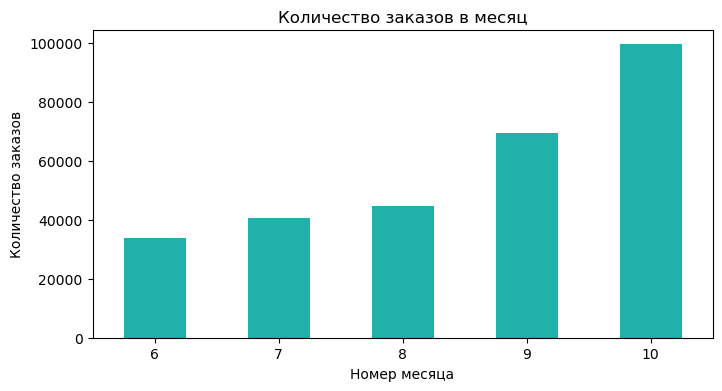

In [40]:
monthly_orders.plot(
    kind='bar', 
    figsize=(8, 4),
    title='Количество заказов в месяц',
    legend=False,
    xlabel='Номер месяца',
    ylabel='Количество заказов',
    rot=0,
    color='lightseagreen'
)
plt.show()

**Распределение количества заказов по месяцам показывает, что количество заказов ежемесячно увеличивается (с июня по октябрь).**

---

#### 3.1.2. Сезонное распределение заказов по типам мероприятий

- Рассчитаем динамику распределения заказов билетов по типам мероприятий и доли каждого мероприятия в общем количестве мероприятий по сезонам
- Построим столбчатую диаграмму для сравнения распределения заказов билетов по типам мероприятий и сезонам


In [41]:
event_type_orders = pd.pivot_table(
    revenue_rub_filtered,
    index='season',
    columns='event_type_main',
    values='order_id',
    aggfunc='count'
)
event_type_orders

event_type_main,выставки,другое,концерты,спорт,стендап,театр,ёлки
season,,,,,,,
лето,2416,32369,50376,3006,6348,23958,273
осень,2436,33225,62905,18881,6924,42762,1695


In [42]:
event_type_orders_share = event_type_orders.apply(lambda x: x / x.sum()*100, axis=1)
event_type_orders_share

event_type_main,выставки,другое,концерты,спорт,стендап,театр,ёлки
season,,,,,,,
лето,2.034595,27.259023,42.423324,2.531454,5.345864,20.175838,0.229902
осень,1.442889,19.679792,37.259815,11.183571,4.101215,25.328737,1.003980


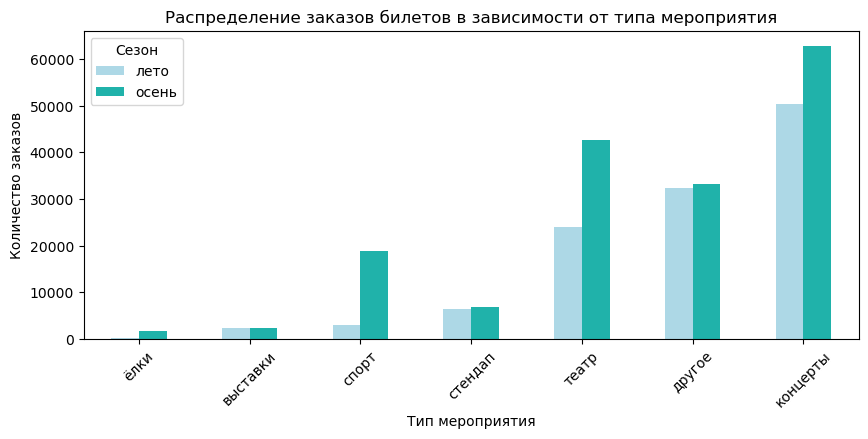

In [43]:
event_type_orders_bar = pd.pivot_table(
    revenue_rub_filtered,
    index='event_type_main',
    columns='season',
    values='order_id',
    aggfunc='count'
)

event_type_orders_bar = event_type_orders_bar.sort_values(by=event_type_orders_bar.columns.tolist(), ascending=True)

colors = ['lightblue', 'lightseagreen']

event_type_orders_bar.plot(
    kind='bar',
    figsize=(10, 4),
    color=colors
)                     

plt.xlabel('Тип мероприятия')
plt.ylabel('Количество заказов')
plt.title('Распределение заказов билетов в зависимости от типа мероприятия')
plt.xticks(rotation=45)
plt.legend(title='Сезон')
plt.show()

- **Рапределение заказов по типам мероприятий показывает, что осенью количество заказов возрастает**. Даже с учетом того, что в летний сезон включены 3 месяца, а в осенний только 2 (сентября и октябрь), количество заказов в осенние месяцы больше. 
- Выделяются ростом спроса `спорт` (количество заказов увеличилось с 3006 до 18881), `елки` (количество заказов увеличилось с 273 до 1695) и `театр` (количество заказов увеличилось с 23958 до 42762). Эти категории отличаются тем, что осенью растет их доля в распределении мероприятий. 
- Доля `концертов`, `выставок`, `стендапа` и `другого` сокращается в общем распределении мероприятий.

---

#### 3.1.3. Сезонное распределение заказов по типу устройств

- Рассчитаем динамику распределения заказов билетов по типам устройств и доли каждого типа устройств в общем количестве устройств по сезонам
- Построим столбчатую диаграмму для сравнения распределения заказов по типу устройств
- Построим столбчатую диаграмму распределения долей заказов билетов по сезонам и типам устройств

In [44]:
device_type_orders = pd.pivot_table(
    revenue_rub_filtered,
    index='season',
    columns='device_type_canonical',
    values='order_id',
    aggfunc='count'
)
device_type_orders

device_type_canonical,desktop,mobile
season,,
лето,22876,95870
осень,34356,134472


In [45]:
device_type_orders_share = device_type_orders.apply(lambda x: x / x.sum()*100, axis=1)
device_type_orders_share

device_type_canonical,desktop,mobile
season,,
лето,19.264649,80.735351
осень,20.349705,79.650295


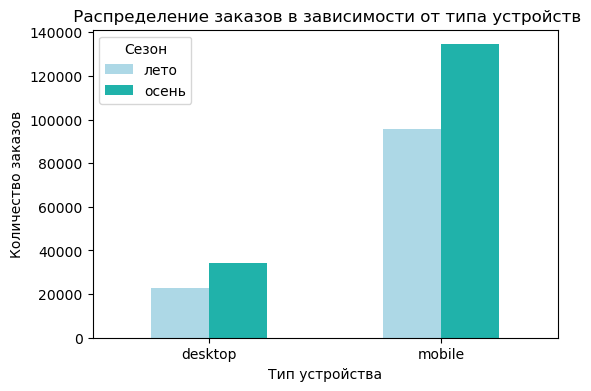

In [46]:
device_type_orders_bar = pd.pivot_table(
    revenue_rub_filtered,
    index='device_type_canonical',
    columns='season',
    values='order_id',
    aggfunc='count'
)

colors = ['lightblue', 'lightseagreen']

device_type_orders_bar.plot(
    kind='bar',
    figsize=(6, 4),
    color=colors
)                     

plt.xlabel('Тип устройства')
plt.ylabel('Количество заказов')
plt.title(' Распределение заказов в зависимости от типа устройств')
plt.xticks(rotation=0)
plt.legend(title='Сезон')
plt.show()

- **Распределение заказов по типам устройств не подвержено значительным сезонным изменениям**, пользователи премущественно пользуются мобильными устройствами; количество заказов в абсолютном выражении возрастает в обеих категориях.

---

#### 3.1.4. Сезонное распределение заказов по возрастному рейтингу

- Рассчитаем динамику распределения заказов билетов по возрастному рейтингу и доли каждой возрастной группы в общем количестве заказов по сезонам
- Построим столбчатую диаграмму для сравнения распределения заказов для каждой возрастной группы

In [47]:
age_type_orders = pd.pivot_table(
    revenue_rub_filtered,
    index='season',
    columns='age_limit',
    values='order_id',
    aggfunc='count'
)
age_type_orders

age_limit,0,6,12,16,18
season,,,,,
лето,21404,21769,23979,33768,17826
осень,39833,29875,37284,44226,17610


In [48]:
age_type_orders_share = age_type_orders.apply(lambda x: x / x.sum()*100, axis=1)
age_type_orders_share

age_limit,0,6,12,16,18
season,,,,,
лето,18.025028,18.332407,20.193522,28.437168,15.011874
осень,23.593835,17.695524,22.084014,26.195892,10.430734


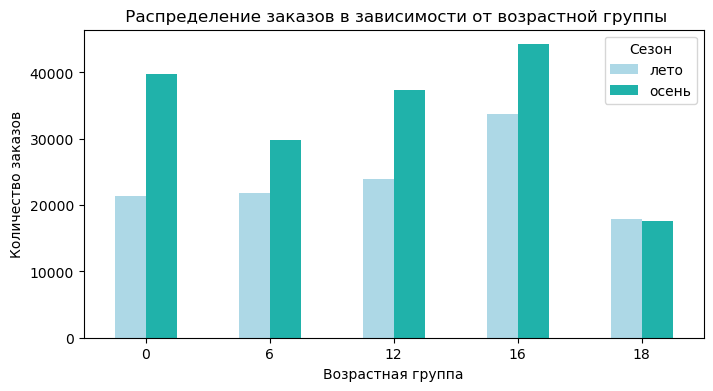

In [49]:
age_type_orders_bar = pd.pivot_table(
    revenue_rub_filtered,
    index='age_limit',
    columns='season',
    values='order_id',
    aggfunc='count'
)

colors = ['lightblue', 'lightseagreen']

age_type_orders_bar.plot(
    kind='bar',
    figsize=(8, 4),
    color=colors
)                     

plt.xlabel('Возрастная группа')
plt.ylabel('Количество заказов')
plt.title(' Распределение заказов в зависимости от возрастной группы')
plt.xticks(rotation=0)
plt.legend(title='Сезон')
plt.show()

**В разрезе возрастных категорий наблюдается сезонное изменение заказов:**
- увеличились доли категорий с возрастным лимитом:
    - `0` - c 18% до 23.6%;
    - `12` - с 20% до 22%;
- сократились доли категорий с возрастным лимитом:
    - `6` - с 18.3% до 17.7%;
    - `16` - c 28% до 26%;
    - `18` - с 15% до 10%.

---

#### 3.1.5. Сезонная выручка с продажи одного билета в зависимости от типа мероприятия 

- Рассчитаем сезонную динамику средней выручки с продажи билета в разрезе разных типов мероприятий
- Построим столбчатую диаграмму для сравнения средних осенних и летних значений выручки с одного билета

In [50]:
revenue_per_event = pd.pivot_table(
    revenue_rub_filtered,
    index='season',
    columns='event_type_main',
    values='one_ticket_revenue_rub',
    aggfunc='mean'
)
revenue_per_event

event_type_main,выставки,другое,концерты,спорт,стендап,театр,ёлки
season,,,,,,,
лето,86.416198,77.433968,300.274761,50.761831,218.585827,214.398965,271.436176
осень,90.603610,76.115334,269.319652,49.969733,231.466954,176.231359,230.310069


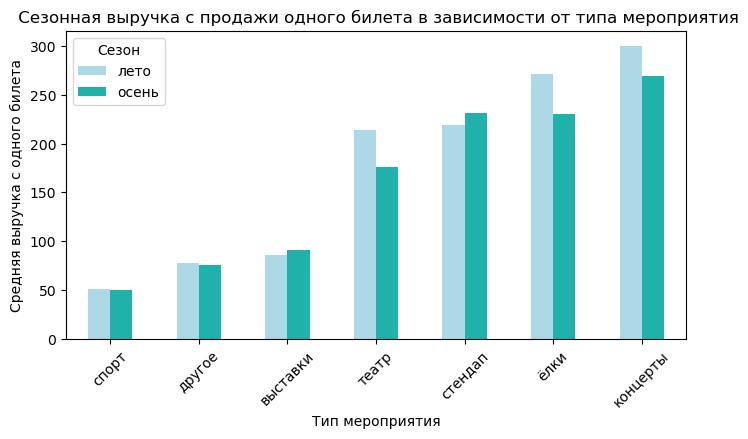

In [51]:
revenue_per_event_bar = pd.pivot_table(
    revenue_rub_filtered,
    index='event_type_main',
    columns='season',
    values='one_ticket_revenue_rub',
    aggfunc='mean'
)

revenue_per_event_bar = revenue_per_event_bar.sort_values(by=revenue_per_event_bar.columns.tolist(), ascending=True)

colors = ['lightblue', 'lightseagreen']

revenue_per_event_bar.plot(
    kind='bar',
    figsize=(8, 4),
    color=colors
)                     

plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя выручка с одного билета')
plt.title(' Сезонная выручка с продажи одного билета в зависимости от типа мероприятия')
plt.xticks(rotation=45)
plt.legend(title='Сезон')
plt.show()

- Рассчитаем относительное изменение осенних значений средней выручки по сравнению с летними и построим столбчатую диаграмму для отображения этого изменения 

In [52]:
A = revenue_per_event.loc['лето']
B = revenue_per_event.loc['осень'] 
revenue_per_event_perc = 100*((B-A)/A)
revenue_per_event_perc

event_type_main
выставки     4.845634
другое      -1.702914
концерты   -10.308928
спорт       -1.560421
стендап      5.892938
театр      -17.802141
ёлки       -15.151299
dtype: float64

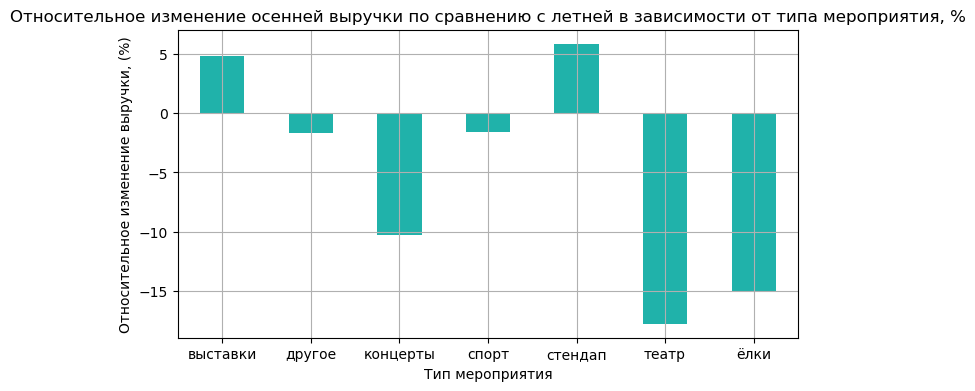

In [53]:
revenue_per_event_perc.plot(
    kind='bar',
    figsize=(8, 4),
    title='Относительное изменение осенней выручки по сравнению с летней в зависимости от типа мероприятия, %',
    xlabel='Тип мероприятия',
    ylabel='Относительное изменение выручки, (%)',
    grid=True,
    rot=0,
    color='lightseagreen'
)                     

plt.show()

**Почти для всех типов мероприятий характерно снижение средней выручки за один билет в осенний период:**
- наибольшее снижение средней выручки за билет наблюдается в категориях:
    - театр (- 17.8%);
    - елки (- 15.2%);
    - концерты (- 10.3%).
- незначительное снижение средней выручки за билет наблюдается в категориях:
    - спорт (- 1.6%);
    - другое (- 1.7%).
- только в 2 категориях средняя выручка за билет увеличивается:
    - выставки (+ 4.8%);
    - стендап (+ 5.9%).


---

### 3.2. Осенняя активность пользователей

#### 3.2.1. Динамика изменений по дням

- Отфильтруем датафрейм, чтобы получить данные за осенние месяцы
- Создадим сводную таблицу 'autumn_pivot' для получения динамики активности пользователей осенью, в которой рассчитаем общее число 
заказов 'order_id' и количество активных пользователей 'user_id'
- Добавим в таблицу столбец `orders_per_user` со средним числом заказов на одного пользователя
- Построим линейные графики:
    - динамики общего *количества заказов* по дням
    - динамики среднего *количества заказов* на одного пользователя по дням

In [54]:
revenue_rub_autumn = revenue_rub_filtered.query("season == 'осень'")

In [55]:
autumn_pivot = pd.pivot_table(
    revenue_rub_autumn,
    index='created_dt_msk',
    values=['order_id', 'user_id'],
    aggfunc={'order_id': 'count', 'user_id': 'nunique'}
).reset_index()
autumn_pivot

,created_dt_msk,order_id,user_id
0,2024-09-01,1331,565
1,2024-09-02,1380,574
2,2024-09-03,5114,778
3,2024-09-04,1774,686
4,2024-09-05,1945,740
...,...,...,...
56,2024-10-27,2854,1036
57,2024-10-28,2841,985
58,2024-10-29,2842,999
59,2024-10-30,2930,1040


In [56]:
autumn_pivot['orders_per_user'] = autumn_pivot['order_id']/autumn_pivot['user_id']
autumn_pivot

,created_dt_msk,order_id,user_id,orders_per_user
0,2024-09-01,1331,565,2.355752
1,2024-09-02,1380,574,2.404181
2,2024-09-03,5114,778,6.573265
3,2024-09-04,1774,686,2.586006
4,2024-09-05,1945,740,2.628378
...,...,...,...,...
56,2024-10-27,2854,1036,2.754826
57,2024-10-28,2841,985,2.884264
58,2024-10-29,2842,999,2.844845
59,2024-10-30,2930,1040,2.817308


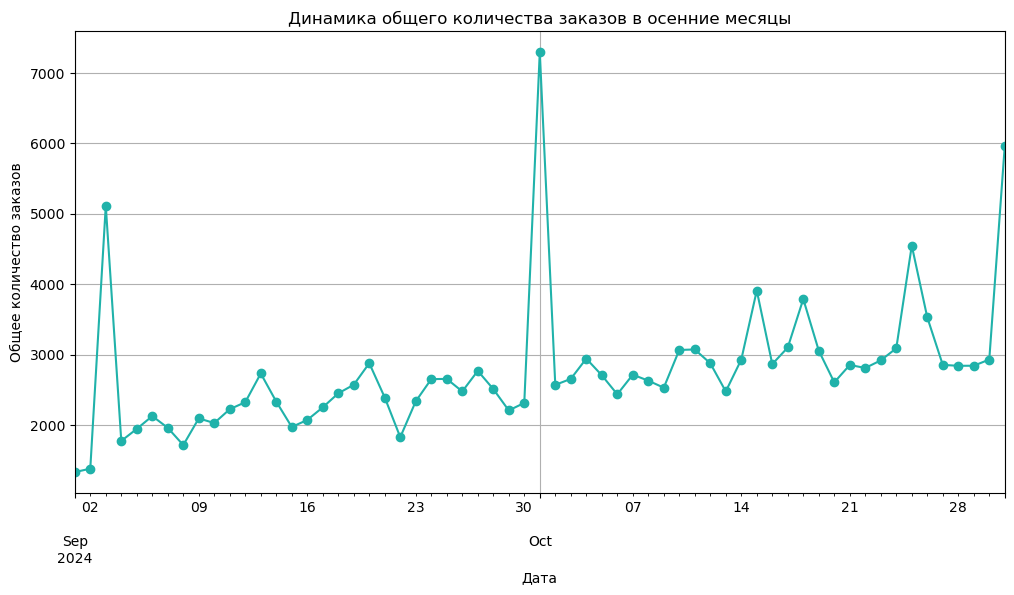

In [57]:
autumn_pivot.plot(
    x='created_dt_msk',
    y='order_id',
    figsize=(12, 6),
    style='-o',
    legend=False,
    color='lightseagreen',
    grid=True,
    title='Динамика общего количества заказов в осенние месяцы'
)

plt.xlabel('Дата')
plt.ylabel('Общее количество заказов')
plt.show()

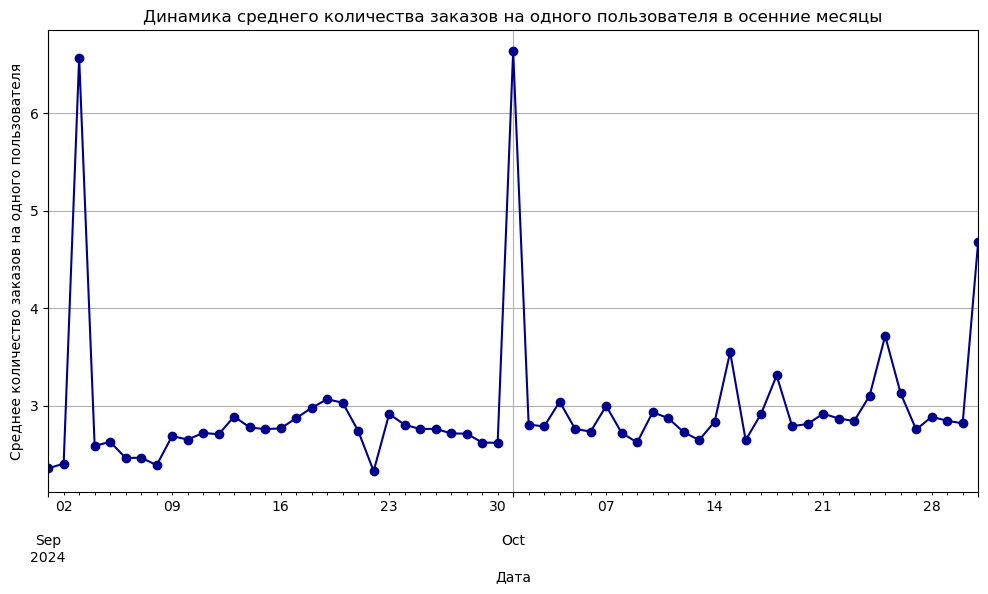

In [58]:
autumn_pivot.plot(
    x='created_dt_msk',
    y='orders_per_user',
    figsize=(12, 6),
    style='-o',
    legend=False,
    color='darkblue',
    grid=True,
    title='Динамика среднего количества заказов на одного пользователя в осенние месяцы'
)

plt.xlabel('Дата')
plt.ylabel('Cреднее количество заказов на одного пользователя')
plt.show()

**Промежуточные выводы о динамике количества заказов:**

- График общего количества заказов имеет положительную динамику с отдельными пиковыми значениями (3 сентября и 1 октября).
- График среднего числа заказов на одного пользователя по дням имеет положительную динамику, как и график общего количества заказов, графики демонстрируют корреляцию, однако рост среднего числа заказов менее значителен. 
- Даты с пиковыми значениями среднего числа заказов на одного пользователя соответствуют датам с пиковыми значениями общего количества заказов (3 сентября и 1 октября).

- Построим линейный график для отображения динамики *количества активных пользователей* по дням

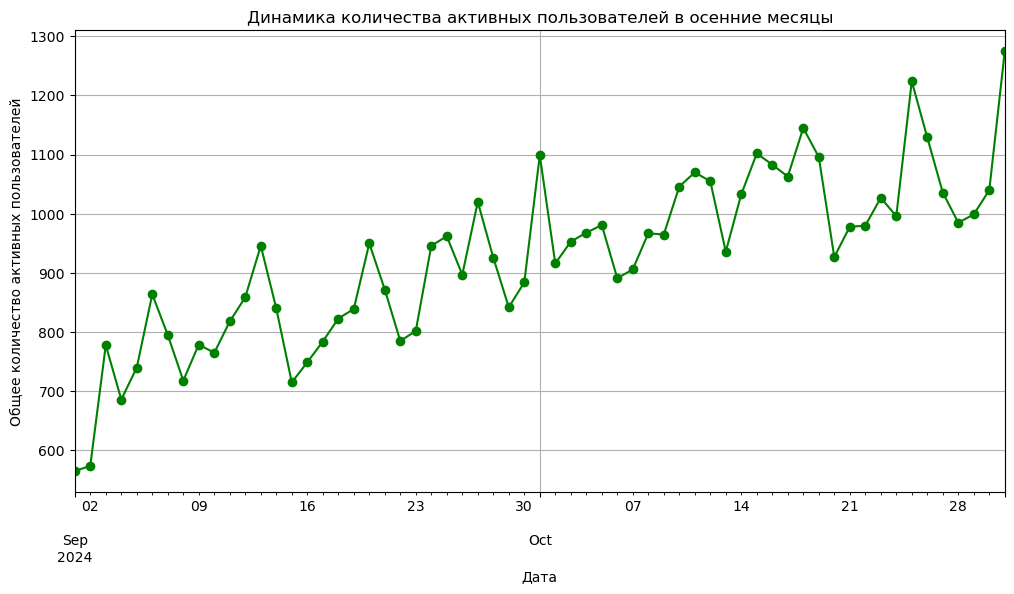

In [59]:
autumn_pivot.plot(
    x='created_dt_msk',
    y='user_id',
    figsize=(12, 6),
    style='-o',
    legend=False,
    color='green',
    grid=True,
    title='Динамика количества активных пользователей в осенние месяцы'
)

plt.xlabel('Дата')
plt.ylabel('Общее количество активных пользователей')
plt.show()

**График количества активных пользователей имеет положительную динамику.**

- Создадим сводную таблицу 'autumn_pivot2' с распределением выручки и количества билетов по дням в осенний период
- Добавим в таблицу столбец `one_ticket_cost` со средней стоимостью одного билета
- Построим линейный график для отображения динамики средней стоимости одного билета по дням в осенний период

In [60]:
autumn_pivot2 = pd.pivot_table(
    revenue_rub_autumn,
    index='created_dt_msk',
    values=['revenue', 'tickets_count'],
    aggfunc={'revenue': 'sum', 'tickets_count': 'sum'}
)

autumn_pivot2

,revenue,tickets_count
created_dt_msk,,
2024-09-01,743946.98,3733
2024-09-02,777955.47,3704
2024-09-03,1236893.87,15301
2024-09-04,955258.49,4808
2024-09-05,1108875.59,5218
...,...,...
2024-10-27,1488389.07,7887
2024-10-28,1377538.01,7940
2024-10-29,1387918.06,7988


In [61]:
autumn_pivot2['one_ticket_cost'] = autumn_pivot2['revenue']/autumn_pivot2['tickets_count']
autumn_pivot2

,revenue,tickets_count,one_ticket_cost
created_dt_msk,,,
2024-09-01,743946.98,3733,199.289306
2024-09-02,777955.47,3704,210.031174
2024-09-03,1236893.87,15301,80.837453
2024-09-04,955258.49,4808,198.681050
2024-09-05,1108875.59,5218,212.509695
...,...,...,...
2024-10-27,1488389.07,7887,188.714222
2024-10-28,1377538.01,7940,173.493452
2024-10-29,1387918.06,7988,173.750383


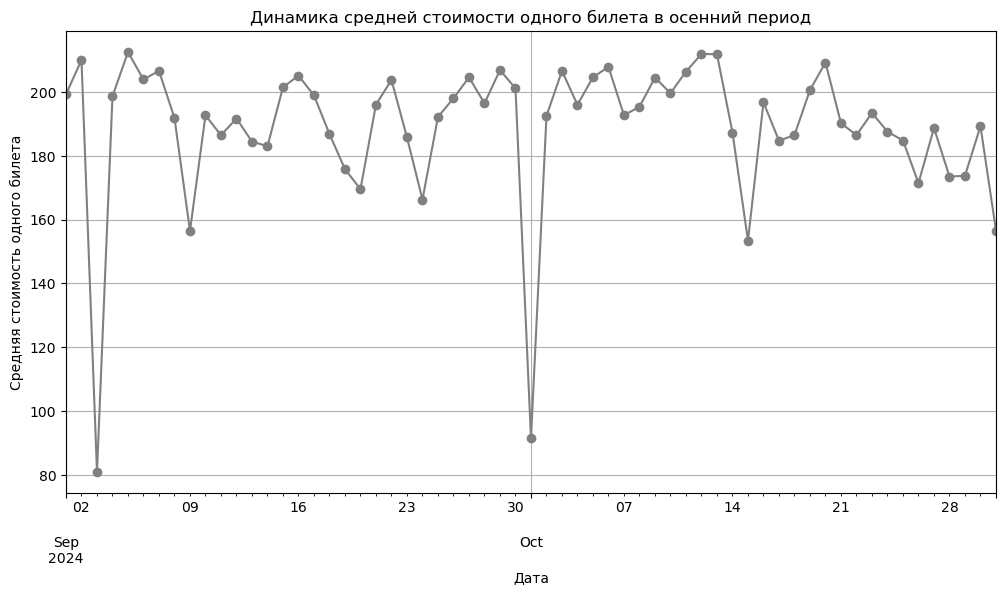

In [62]:
autumn_pivot2.plot(
    y='one_ticket_cost',
    figsize=(12, 6),
    style='-o',
    legend=False,
    color='grey',
    grid=True,
    title='Динамика средней стоимости одного билета в осенний период'
)

plt.xlabel('Дата')
plt.ylabel('Средняя стоимость одного билета')
plt.show()

**Промежуточные выводы о средней стоимости одного билета:**

Средняя стоимость одного билета в основном колеблется в пределах 150-210 рублей. Примечательно, что 3 сентября и 1 октября  наблюдается резкое сокращение средней стоимости одного билета до 80 рублей и 91 рубля соответственно, что может свидетельствовать об акциях, действующих в эти дни. Этим же датам соответствует резкое увеличение среднего количества билетов на одного пользователя и общего количества заказов. Также в эти даты происходит увеличение количества активных пользователей.

---

#### 3.2.2. Недельная цикличность по дням недели
    
- Добавим в сводную таблицу 'autumn_pivot' столбец `dayofweek` с днем недели регистрации пользователя
- Сгруппируем количество заказов по дням недели
- Добавим в полученный датафрейм 'weekly_pivot' столбец `order_perc` с распределением заказов по дням недели в процентах
- Отразим на линейном графике цикличность активности пользователей в зависимости от дней недели

In [63]:
autumn_pivot['dayofweek'] = autumn_pivot['created_dt_msk'].dt.dayofweek + 1
autumn_pivot.head()

,created_dt_msk,order_id,user_id,orders_per_user,dayofweek
0,2024-09-01,1331,565,2.355752,7
1,2024-09-02,1380,574,2.404181,1
2,2024-09-03,5114,778,6.573265,2
3,2024-09-04,1774,686,2.586006,3
4,2024-09-05,1945,740,2.628378,4


In [64]:
weekly_pivot = autumn_pivot.groupby('dayofweek').agg({
    'order_id': 'sum'
}).reset_index()
weekly_pivot

,dayofweek,order_id
0,1,21535
1,2,31533
2,3,22917
3,4,27197
4,5,24859
5,6,21362
6,7,19425


In [65]:
weekly_pivot['order_perc'] = weekly_pivot['order_id']/weekly_pivot['order_id'].sum()*100
weekly_pivot

,dayofweek,order_id,order_perc
0,1,21535,12.755586
1,2,31533,18.677589
2,3,22917,13.574170
3,4,27197,16.109295
4,5,24859,14.724453
5,6,21362,12.653114
6,7,19425,11.505793


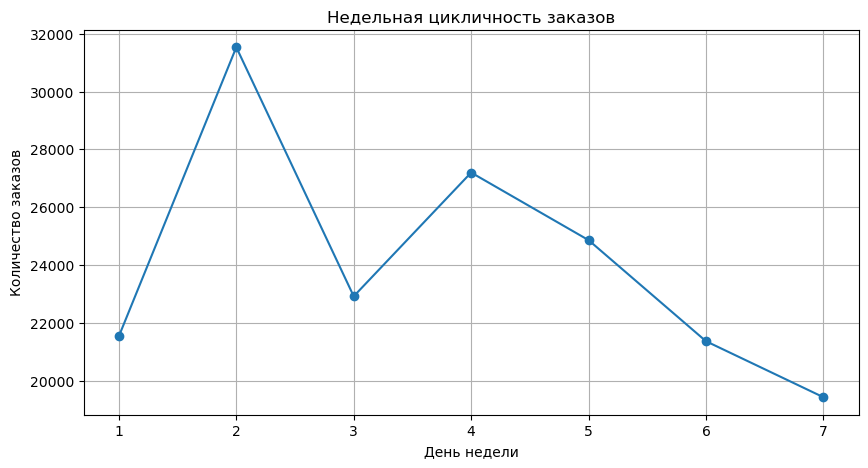

In [66]:
weekly_pivot_line = weekly_pivot.groupby('dayofweek').sum()

weekly_pivot_line['order_id'].plot(
    kind='line', 
    figsize=(10, 5), 
    style='-o',
    title='Недельная цикличность заказов'
)

plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

График недельной цикличности показал:

- наибольшее количество заказов совершается во вторник(18.7%) и в четверг(16.1%);
- менее активны пользователи в понедельник(12.8%), среду(13.6%), пятницу(14.7%);
- наименьшее количество заказов приходится на субботу(12.7%) и воскресенье(11.5%).

Вывод: **пользовательская активность выше в будние дни, чем в выходные**.

---

#### 3.2.3. Недельная цикличность с категоризацией на выходные и будние дни

- Проведем категоризацию дней недели и выделим следующие категории: выходные дни 'dayoff' (с 6 по 7 дни), будние дни 'weekday' (с 1 по 5 дни)
- Сравним активность пользователей в будние и в выходные дни с инпользованием группировки
- Построим круговую диаграмму для отображения активности пользователей в будние и выходные дни

In [67]:
autumn_pivot['week_off'] = pd.cut(autumn_pivot['dayofweek'], bins=[0, 5, 7], labels=['weekday', 'dayoff'])
autumn_pivot.head()

,created_dt_msk,order_id,user_id,orders_per_user,dayofweek,week_off
0,2024-09-01,1331,565,2.355752,7,dayoff
1,2024-09-02,1380,574,2.404181,1,weekday
2,2024-09-03,5114,778,6.573265,2,weekday
3,2024-09-04,1774,686,2.586006,3,weekday
4,2024-09-05,1945,740,2.628378,4,weekday


In [68]:
week_activity = autumn_pivot.groupby('week_off', observed=True).agg({'user_id': 'sum'})
week_activity

,user_id
week_off,
weekday,41285
dayoff,15109


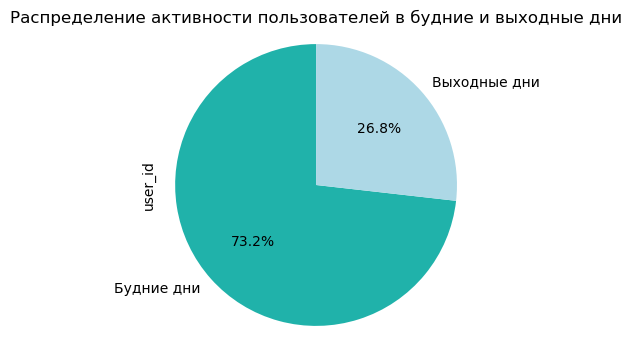

In [69]:
week_activity['user_id'].plot(
    kind='pie',
    figsize=(4,4),                                                          
    startangle=90,
    legend=False,
    autopct='%1.1f%%',
    labels=['Будние дни', 'Выходные дни'],
    colors=['lightseagreen', 'lightblue'])
                                        
plt.title('Распределение активности пользователей в будние и выходные дни')
plt.axis('equal')
plt.show()        

В будние дни активность пользователей почти в 3 раза выше, чем в выходные дни. На будние дни приходится 73.2% активных пользователей, на выходные - 26.8%.

---

### 3.3. Популярные события и партнёры

#### 3.3.1. Распределение популярности событий и пользовательской активности в регионах

- Рассчитаем распределение событий по регионам и выведем на экран ТОП-10 регионов
- Добавим в датафрейм 'regions' столбец `events_share` с долей проводимых мероприятий от их общего числа
- Добавим в датафрейм 'regions' столбец `orders_share` с долей заказов от их общего числа

In [70]:
regions = revenue_rub_filtered.groupby('region_name').agg({
    'event_name': 'nunique',
    'order_id': 'count'
}).sort_values(by='event_name', ascending=False).reset_index()
regions.head(10)

,region_name,event_name,order_id
0,Каменевский регион,4751,89749
1,Североярская область,3196,43752
2,Светополянский округ,997,7502
3,Широковская область,992,16172
4,Речиновская область,653,6268
5,Травяная область,561,5036
6,Медовская область,485,13893
7,Горицветская область,479,5154
8,Серебринская область,470,5591
9,Тепляковская область,470,4385


In [71]:
regions['events_share'] = regions['event_name']/regions['event_name'].sum()*100
regions['orders_share'] = regions['order_id']/regions['order_id'].sum()*100
regions.head(10)

,region_name,event_name,order_id,events_share,orders_share
0,Каменевский регион,4751,89749,24.792569,31.209011
1,Североярская область,3196,43752,16.677973,15.214171
2,Светополянский округ,997,7502,5.202734,2.608720
3,Широковская область,992,16172,5.176642,5.623596
4,Речиновская область,653,6268,3.407608,2.179613
5,Травяная область,561,5036,2.927517,1.751201
6,Медовская область,485,13893,2.530919,4.831104
7,Горицветская область,479,5154,2.499609,1.792234
8,Серебринская область,470,5591,2.452643,1.944195
9,Тепляковская область,470,4385,2.452643,1.524825


**Наибольшее разнообразие мероприятий** характерно для:
- `Каменевского региона` - 4751 мероприятие (24% от общего числа мероприятий);
- `Североярской области` - 3196 мероприятий (16% от общего числа мероприятий).

В эти же регионы приходится **наибольшее количество заказов**:
- `Каменевский регион` - 89749 заказов (31.2% от общего количества заказов);
- `Североярская область` - 43752 заказов (15.2% от общего количества заказов).

---

#### 3.3.2. Распределение популярности событий и пользовательской активности в разрезе билетных партнеров

- Рассчитаем распределение мероприятий по билетным партнерам и выведем на экран ТОП-10 билетных партнеров
- Добавим в датафрейм 'service' столбец `events_share` с долей проводимых мероприятий от их общего числа
- Добавим в датафрейм 'service' столбец `orders_share` с долей заказов от их общего числа
- Добавим в датафрейм 'service' столбец `revenue_share` с выручкой от общей выручки

In [72]:
service = revenue_rub_filtered.groupby('service_name').agg({
    'event_name': 'nunique',
    'order_id': 'count',
    'revenue': 'sum'
}).sort_values(by='event_name', ascending=False).reset_index()

service.head(10)

,service_name,event_name,order_id,revenue
0,Лови билет!,3859,40823,16729886.47
1,Билеты без проблем,3156,63064,27018565.41
2,Билеты в руки,2942,40284,13202172.24
3,Облачко,1762,26410,18609295.34
4,Лучшие билеты,1514,17741,2724060.58
5,Мой билет,1031,33957,31868083.83
6,Тебе билет!,925,5200,2988324.62
7,Прачечная,874,10222,4746810.52
8,Весь в билетах,688,16438,16566881.11
9,Яблоко,612,5005,3870922.60


In [73]:
service['events_share'] = service['event_name']/service['event_name'].sum()*100
service['orders_share'] = service['order_id']/service['order_id'].sum()*100
service['revenue_share'] = service['revenue']/service['revenue'].sum()*100
service.head(10)

,service_name,event_name,order_id,revenue,events_share,orders_share,revenue_share
0,Лови билет!,3859,40823,16729886.47,19.438847,14.195651,10.307195
1,Билеты без проблем,3156,63064,27018565.41,15.897643,21.929660,16.645997
2,Билеты в руки,2942,40284,13202172.24,14.819666,14.008220,8.133789
3,Облачко,1762,26410,18609295.34,8.875680,9.183723,11.465089
4,Лучшие билеты,1514,17741,2724060.58,7.626436,6.169195,1.678279
5,Мой билет,1031,33957,31868083.83,5.193431,11.808091,19.633760
6,Тебе билет!,925,5200,2988324.62,4.659480,1.808230,1.841091
7,Прачечная,874,10222,4746810.52,4.402579,3.554563,2.924485
8,Весь в билетах,688,16438,16566881.11,3.465646,5.716094,10.206769
9,Яблоко,612,5005,3870922.60,3.082813,1.740422,2.384855


Среди **наиболее популярных билетных партнеров** следует отметить следующих:
- `Лови билет!` - 3859 мероприятий (19.4% от общего числа мероприятий);
- `Билеты без проблем` - 3156 мероприятий (15.9% от общего числа мероприятий);
- `Билеты в руки` - 2942 мероприятия (14.8% от общего числа мероприятий);
- `Облачко` - 1762 мероприятия (8.9% от общего числа мероприятий);
- `Лучшие билеты` - 1514 мероприятий (7.6% от общего числа мероприятий);
- `Мой билет` - 1031 мероприятие (5.2% от общего числа мероприятий).

На этих же билетных партнеров приходится **наибольшее количество заказов**:
- `Лови билет!` - 40823 заказа (14.2% от общего числа заказов);
- `Билеты без проблем` - 63064 заказа (21.9% от общего числа заказов);
- `Билеты в руки` - 40284 заказа (14% от общего числа заказов);
- `Облачко` - 26410 заказов (9.2% от общего числа заказов);
- `Лучшие билеты` - 17741 заказ (6.2% от общего числа заказов);
- `Мой билет` - 33957 заказов (11.8% от общего числа заказов).

**Наибольшая доля выручки** приходится на следующих билетных партнеров:
- `Лови билет!` - 10.3% от всей выручки;
- `Билеты без проблем` - 16.6% от всей выручки;
- `Билеты в руки` - 8.1% от всей выручки;
- `Облачко` - 11.5% от всей выручки;
- `Мой билет` - 19.6% от всей выручки;
- `Весь в билетах` - 10.2% от всей выручки. Количество мероприятий данного билетного партнера невысоко - 688, количество заказов = 16438 (5.7%).

---


## Статистический анализ данных

### Гипотеза 1

Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза H₀:** Среднее количество заказов на одного пользователя мобильного приложения не больше, чем на одного пользователя стационарных устройств.

- **Альтернативная гипотеза H₁:** Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

Последовательность шагов:

- Отфильтруем из датафрейма данные за осенние месяцы
- Разделим полученный датафрейм 'revenue_rub_autumn' на датафреймы 'desktop' и 'mobile'
- Посчитаем количество заказов для каждого пользователя мобильных устройств и для каждого пользователя стационарных устройств с использованием группировки
- Для проведение гипотезы проверим независимость групп: есть ли пользователи, которые попали одновременно в группы mobile и desktop. Удалим дублирующихся пользователей в исходном датафрейме 'revenue_rub_autumn'
- Проверим количество заказов для каждого пользователя мобильных устройств и для каждого пользователя стационарных устройств после удаления дублирующихся пользователей
- Рассчитаем количество уникальных пользователей в группе пользователей мобильных и стационарных устройств
- Построим круговую диаграмму с распределением пользователей между мобильными и стационарными устройствами

In [74]:
revenue_rub_autumn = revenue_rub_filtered.query("season == 'осень'")

In [75]:
desktop = revenue_rub_autumn[revenue_rub_autumn['device_type_canonical'] == 'desktop']
mobile = revenue_rub_autumn[revenue_rub_autumn['device_type_canonical'] == 'mobile']

In [76]:
df_mobile_orders = mobile.groupby('user_id').agg({
    'order_id': 'count'
}).sort_values('order_id', ascending=False).reset_index()
df_mobile_orders.head()

,user_id,order_id
0,0beb8fc0c0a9ce1,4335
1,18e9aead0a393e7,2119
2,8187dac4be757a0,1795
3,3ee7dc2e115847f,1785
4,4ec8f6429431987,1721


In [77]:
df_desktop_orders = desktop.groupby('user_id').agg({
    'order_id': 'count'
}).sort_values('order_id', ascending=False).reset_index()
df_desktop_orders.head()

,user_id,order_id
0,0beb8fc0c0a9ce1,1504
1,7d22e22c99ec66e,716
2,cdbc02c6ad8087a,637
3,7eb4fc207ecc10f,600
4,18e9aead0a393e7,594


In [78]:
group_mobile = mobile['user_id']
group_desktop = desktop['user_id']

intersection = list(set(group_mobile) & set(group_desktop))
print(intersection)

['c6ae4b598a40999', '216c0e668403804', '040aed8d5c29389', '1fef16ab468202d', '7f3c961dbd37131', 'dd6384da1d60462', '10fbcb17b7f72ca', 'ca131e2541488ce', 'e504837e9afab52', 'd290b36577c9879', '1098b8f734e5a7a', '247521d9c1516f6', '16d306848fd88cc', '390cc994be294ac', '949b3ef04574bd0', '5826ce97061f28c', '5d716298d972f92', 'd958e136783142e', '231bfc0cbc87bbd', '4e484eb2c013663', '32af03e02ee6944', '3a7888c04e87477', '533151275d676d0', '463ad9b1fdcc1c6', 'ac10898c84b067d', '18e9aead0a393e7', '4be942af944f54f', 'be179d5e66ec15f', '2d6f0172e519f4b', '3dc236f8d425b5b', '351122e8012b24a', '50eb77276f29d38', '5945ef27ea29124', '9ff72f4bfa7558a', '9be9eb582224e7e', 'e1011b811b8f1e1', '315cac09f7bb0e6', '6c94dea24d07f78', 'ab751e152297818', 'c0dd11e63b84729', 'd7a468908a3288f', 'ffb51f6745ee8a2', '54189ec740d0c5e', 'ef8e90f65f4230d', '0fe9fd52e8427ae', 'ef79b4a85a25001', '14a81c560d778c4', '6d22e8f2f7a76dd', 'eebad7e760555ec', '10a18b1f7457511', 'b94a54eb7dfbc06', 'a01d369c103c725', '7511759c37

In [79]:
revenue_rub_autumn = revenue_rub_autumn[~revenue_rub_autumn['user_id'].isin(intersection)]
mobile = mobile[~mobile['user_id'].isin(intersection)] 
desktop = desktop[~desktop['user_id'].isin(intersection)]

In [80]:
df_mobile_orders = mobile.groupby('user_id').agg({
    'order_id': 'count'
}).sort_values('order_id', ascending=False).reset_index()
df_mobile_orders.head()

,user_id,order_id
0,f69ede3411d9a97,123
1,0ae42a8c1d07049,74
2,3530a91eedecc9a,62
3,41024e5c67313be,59
4,e609842e020a10f,55


In [81]:
df_desktop_orders = desktop.groupby('user_id').agg({
    'order_id': 'count'
}).sort_values('order_id', ascending=False).reset_index()
df_desktop_orders.head()

,user_id,order_id
0,2cba8e7c2420f5b,56
1,cbe06d8837e87fb,44
2,b14d95aab20f46d,44
3,a00c83aac8fea5f,43
4,4c124b6d79dc691,28


In [82]:
hip1 = revenue_rub_autumn.groupby('device_type_canonical').agg({
    'user_id': 'nunique'
}).reset_index()
hip1

,device_type_canonical,user_id
0,desktop,1623
1,mobile,10948


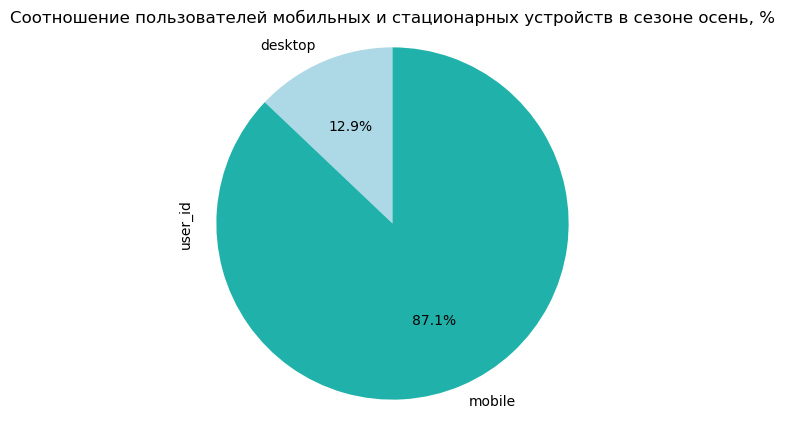

In [83]:
hip1['user_id'].plot(
    kind='pie',
    figsize = (5,5),
    startangle=90,
    legend=False,
    autopct='%1.1f%%',
    labels=['desktop', 'mobile'],
    colors=['lightblue', 'lightseagreen'])

plt.title('Соотношение пользователей мобильных и стационарных устройств в сезоне осень, %')
plt.axis('equal')
plt.show()

Даиграмма показывает, что **пользователи разделены между группами неравномерно:**
- на мобильные устройства приходится 87.1% всех пользователей;
- на стационарные устройства приходится 12.9% всех пользователей.


Проверим распределение заказов среди пользователей мобильных и стационарных устройств

In [84]:
display(df_mobile_orders['order_id'].describe())
display(df_desktop_orders['order_id'].describe())

count    10948.000000
mean         2.860066
std          4.097778
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        123.000000
Name: order_id, dtype: float64

count    1623.000000
mean        1.967344
std         3.054304
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        56.000000
Name: order_id, dtype: float64

- Распределение заказов среди пользователей мобильных и стационарных устройств неравномерное.
- Среднее значение числа заказов для пользователей мобильных устройств = 2.86, медиана = 2, стандартное отклонение = 4.1
- Среднее значение числа заказов для пользователей стационарных устройств = 1.97, медиана = 1, стандартное отклонение = 3.1

Размеры групп пользователей мобильных и стационарных устройств значительно отличаются. Эти условия являются основанием для применения ***t-теста Уэлча***.

In [85]:
df_mobile = df_mobile_orders['order_id'] 
df_desktop = df_desktop_orders['order_id'] 

mobile_mean = round(df_mobile.mean(), 2)
desktop_mean = round(df_desktop.mean(), 2)

print(f'Среднее количество заказов у пользователей мобильных устройств {mobile_mean}')
print(f'Среднее количество заказов у пользователей стационарных устройств {desktop_mean}')

alpha = 0.05 
stat_welch_ttest, p_value_welch_ttest = st.ttest_ind(
    df_mobile, 
    df_desktop, 
    equal_var=False,
    alternative='greater')

if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в группах df_mobile и df_desktop равны')
else:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах  df_mobile и df_desktop не равны, и в группе df_desktop меньше')

Среднее количество заказов у пользователей мобильных устройств 2.86
Среднее количество заказов у пользователей стационарных устройств 1.97
p-value теста Уэлча = 2.0482347191993962e-25
Нулевая гипотеза не находит подтверждения! Выборочные средние в группах  df_mobile и df_desktop не равны, и в группе df_desktop меньше


- t-тест Уэлча показал, что p-value < alpha, что означает, что различие между выборочными средними в группах  df_mobile и df_desktop являются статистически значимыми, следовательно, нулевая гипотеза не находит подтверждение. **Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.**

---

### Гипотеза 2

Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза H₀:** Среднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств.

- **Альтернативная гипотеза H₁:** Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.


Используем датафреймы 'mobile' и 'desktop', полученные при проверке предыдущей гипотезы (данные, отфильтрованные для осенних месяцев и очищенные от дублирующихся пользователей и в группах).

- Отфильтруем из датафреймов пропуски, имеющиеся в столбце 'days_since_prev', содержащем информацию с количеством дней с предыдущей покупки для каждого пользователя

In [86]:
mobile_filtered = mobile[mobile['days_since_prev'].notna()]
desktop_filtered = desktop[desktop['days_since_prev'].notna()]

Для тестирования гипотезы используем ***тест Манна-Уитни***, который позволяет проверить, различаются ли распределения между двумя выборками (в данном случае, среднее время между заказами пользователей мобильных и стационарных устройств)

In [87]:
df_mobile_days = mobile_filtered['days_since_prev']
df_desktop_days = desktop_filtered['days_since_prev']

alpha = 0.05
mw_test = mannwhitneyu(
    df_mobile_days,
    df_desktop_days,
    alternative='less'
)

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах df_mobile_days и df_desktop_days равны')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах df_mobile_days и df_desktop_days различаются')

pvalue=0.9999999149076171 > 0.05
Нулевая гипотеза находит подтверждение! Распределения метрики в группах df_mobile_days и df_desktop_days равны


---

Тест Манна-Уитни показал, что pvalue=0.9999999149076171 > alpha = 0.05, что означает, что различия распределения между 2 группами не являются статистически значимыми, следовательно, нулевая гипотеза подтверждается. **Среднее время между заказами пользователей мобильных и стационарных устройств не отличается.**

---

## Общий вывод

**Информация о данных:**

1. В проекте использованы данные двух датафреймов, которые были объединены в единый датафрейм. На **этапе предобработки данных** удалены 30 явных дубликатов, преобразован тип данных для столбцов, содержащих дату и время; изменена разрядность для целочисленных типов данных.
2. Проведена оценка распределения выручки в рублях и тенге, которая показала неравномерность распределения и наличие большого количества выбросов. 
4. Проведена оценка распределение количества заказов в рублях и тенге. Распределение в рублях оказалось относительно равномерным, но с выбросами; распределение в тенге - близко к нормальному, без выбросов.
5. В датафрейм добавлены дополнительные столбцы: 
    - `revenue_rub` - столбец, в котором вся выручка приведена к рублям (с использованием курса тенге);
    - `month` - месяц оформления заказа;
    - `one_ticket_revenue_rub` - выручка с продажи одного билета на мероприятие;
    - `season` - столбец с информацией о сезонности, включая категории `лето`, `зима`, `осень`, `весна`.
6. датафрейм с дополнительными столбцами отфильтрован от выбросов - отбраны значения по 99-му процентилю. Полученный датафрейм `revenue_rub_filtered` использовался для проведения анализа.

**Основные результаты анализа:**

1. Распределение количества заказов по месяцам показало, что **количество заказов ежемесячно увеличивается** (с июня по октябрь), значительный рост наблюдался в сентябре и октябре.
2. В осенние месяцы возрос спрос на следующие типы мероприятий: `спорт`, `елки` и `стендап`, а также увеличилась их доля в общем распределении.
3. Почти для всех типов мероприятий характерно **снижение средней выручки за один билет в осенний период**: театр (- 17.8%), елки (- 15.2%), концерты (- 10.3%), спорт (- 1.6%), другое (- 1.7%). Только в двух категориях произошел рост средней выручки: выставки (+ 4.8%), стендап (+ 5.9%).
4. В осенний период отмечено изменение распределения заказов по возрастному рейтингу, но оно незначительно. 
5. Анализ пользовательской активности **осенью** продемонстрировал **рост среднего и общего количества заказов по дням**. 3 сентября и 1 октября произошло резкое сокращение средней стоимости одного билета до 80 рублей и 91 рубля, что привело к резкому увеличению среднего количества билетов на одного пользователя, общего количества заказов и количества активных пользователей.  Это может свидетельствовать об акциях, действующих в эти дни, которые привели к росту спроса.
6. Распределение заказов между будними и выходными дня показало **бОльшую активность пользователей в будние дни**, чем в выходные. Наибольшее количество заказов совершается во вторник(18.7%) и четверг(16.1%); наименьшее - в субботу(12.7%) и воскресенье(11.5%).
7. **Регионы-лидеры** по разнообразию мероприятий и количеству заказов: `Каменевский регион` и `Североярская область`.
8. Наиболее **популярные билетные партнеры** (лидеры по разнообразию мероприятий, количеству заказов и выручки): `Лови билет!`, `Билеты без проблем`, `Билеты в руки`.
9. Большинство заказов в сервисе Яндекс Афиша совершается с мобильных устройств: приблизительно 80% всех заказов независимо от сезонности.
10. **Проверка гипотез** показала, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств и среднее время между заказами пользователей мобильных и стационарных устройств не отличается.

**Рекомендации:**

1. Так как большая часть заказов приходит от пользователей мобильных устройств, рекомендуется показывать таким пользователям контекстную рекламу о проводимых мероприятиях, о скидках и предложениях.
2. Для привлечения пользователей можно предлагать промокоды на приобретение билетов на новые мероприятия, действующие в течение определенного срока (например, 1 месяц). Как показал анализ, снижение стоимости билета приводит к резкому увеличению спроса и, соответственно, выручки. В преддверии праздничного предновогоднего времени это может быть особенно актуально.
3. Следует рассмотреть вариант расширения предлагаемых мероприятий в регионах, т.к. высокое разнообразие сопровождается большим количеством заказов.